In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from scipy.signal import find_peaks

In [2]:
formatter_s = EngFormatter(unit='s')
formatter_w = EngFormatter(unit='W')
def plot_pp(times,chs,labels=None,labels_title=None,title=None,file_path=None):
    plt.rcParams["figure.figsize"] = (8,4)
    for i, (t, ch) in enumerate(zip(times,chs)):
        plt.plot(t,ch,linewidth=.8)
    if labels is not None:
        plt.legend(labels,title=labels_title,bbox_to_anchor=(1.01, 1),loc='upper left', borderaxespad=0.,fontsize=14,title_fontsize=16)
    if title is not None:
        plt.title(title,fontsize=18)
    plt.grid()
    plt.gca().xaxis.set_major_formatter(formatter_s)
    plt.gca().yaxis.set_major_formatter(formatter_w)
    plt.ylabel('power',fontsize=16)
    plt.xlabel('time',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    if file_path is not None:
        plt.savefig(file_path)
    plt.show()

In [3]:
pp3_3 = pd.read_csv("Data/3,3.csv",    delimiter=',',skiprows=7, index_col=0)
pp3_0 = pd.read_csv("Data/3,0.csv",    delimiter=',',skiprows=7, index_col=0)
pp2_8 = pd.read_csv("Data/2,8.csv",    delimiter=',',skiprows=7, index_col=0)
pp2_6 = pd.read_csv("Data/2,6_LDO.csv",delimiter=',',skiprows=7, index_col=0)
pp2_4 = pd.read_csv("Data/2,4_LDO.csv",delimiter=',',skiprows=7, index_col=0)
pp2_2 = pd.read_csv("Data/2,2_LDO.csv",delimiter=',',skiprows=7, index_col=0)
pp2_0 = pd.read_csv("Data/2,0_LDO.csv",delimiter=',',skiprows=7, index_col=0)
pp1_8 = pd.read_csv("Data/1,8_LDO.csv",delimiter=',',skiprows=7, index_col=0)
pps  = [pp3_3,pp3_0,pp2_8,pp2_6,pp2_4,pp2_2,pp2_0,pp1_8]

vdd = np.array([3.3,3.0,2.8,2.6,2.4,2.2,2.0,1.8])
for i,pp in enumerate(pps):
    pp['CH1(V)'] = (vdd[i] - pp['CH1(V)']) * pp['CH1(V)'] / 177
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

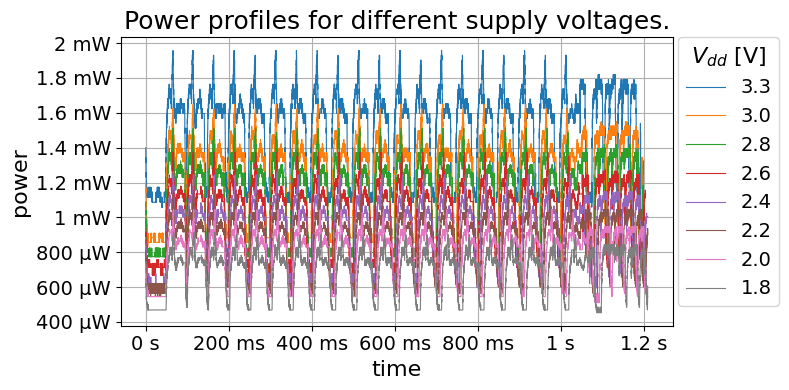

In [4]:
npps = []
for ind, pp in enumerate(pps):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.0001)
    
    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.00005:
            break

    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    if ind==0:
        stop = np.argmin(np.abs(time-1.193))
    elif ind==1:
        stop = np.argmin(np.abs(time-1.197))
    elif ind==2:
        stop = np.argmin(np.abs(time-1.2))
    elif ind==3:
        stop = np.argmin(np.abs(time-1.205))
    elif ind==4:
        stop = np.argmin(np.abs(time-1.21))
    elif ind==5:
        stop = np.argmin(np.abs(time-1.21))
    elif ind==6:
        stop = np.argmin(np.abs(time-1.21))
    else:
        stop = np.argmin(np.abs(time-1.21))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps.append(npp)

times = [npp['t'] for npp in npps]
chs   = [npp['w'] for npp in npps]
labels = ["3.3","3.0","2.8","2.6","2.4","2.2","2.0","1.8"]
labels_title = "$V_{dd}$ [V]"
title = "Power profiles for different supply voltages."
plot_pp(times,chs,labels,labels_title,title,'Export/pp3,3to1,8.pdf')

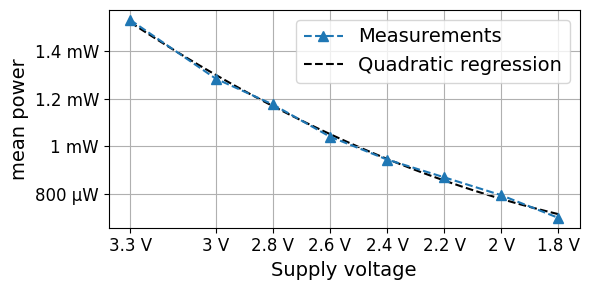

average power @ 1.8 V: 697.601 µV


In [8]:
means = np.array([np.mean(npp['w']) for npp in npps])
formatter_v = EngFormatter(unit='V')
plt.rcParams["figure.figsize"] = (6,3)
plt.plot(vdd, means,'--^', markersize=7, label='Measurements')
p = np.poly1d(np.polyfit(vdd, means, 2))
longvdd = np.linspace(3.3,1.8,100)
plt.plot(longvdd,p(longvdd),'--',color='black', label='Quadratic regression',zorder=0)
plt.gca().xaxis.set_major_formatter(formatter_v)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.gca().set_xticks(vdd)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_inverted(True)
plt.ylabel('mean power',fontsize=14)
plt.xlabel('Supply voltage',fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('Export/vddVSW.pdf')
plt.show()
print(f"average power @ 1.8 V: {means[7]*1000*1000:.3f} µV")

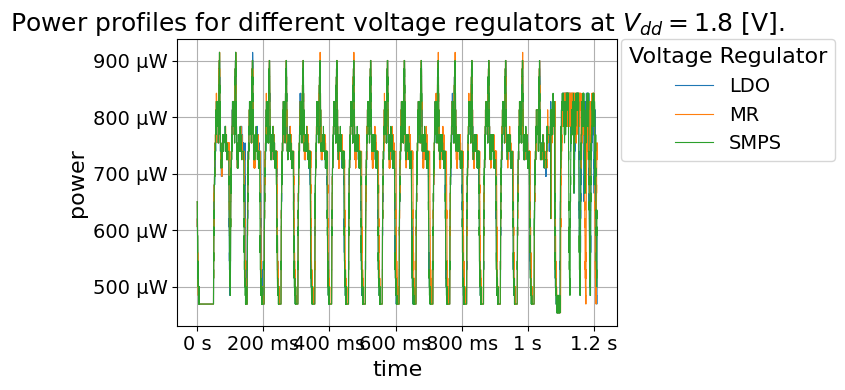

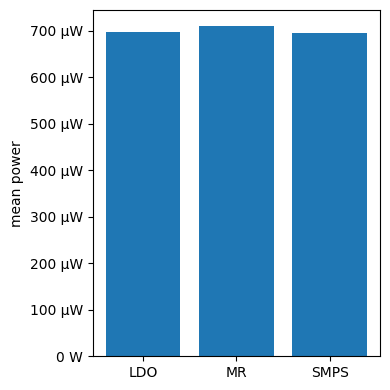

In [6]:
# pp1_8
pp1_8_MR   = pd.read_csv("Data/1,8_MR.csv",  delimiter=',',skiprows=7, index_col=0)
pp1_8_SMPS = pd.read_csv("Data/1,8_SMPS.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp1_8_MR,pp1_8_SMPS]):
    pp['CH1(V)'] = (1.8 - pp['CH1(V)']) * pp['CH1(V)'] / 177
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps1_8 = [pp1_8,pp1_8_MR,pp1_8_SMPS]

npps1_8 = []
for ind, pp in enumerate(pps1_8):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.0001)
    
    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.00005:
            break

    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.21))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps1_8.append(npp)

times = [npp['t'] for npp in npps1_8]
chs   = [npp['w'] for npp in npps1_8]
labels = ["LDO","MR","SMPS"]
labels_title = "Voltage Regulator"
title = "Power profiles for different voltage regulators at $V_{dd} = 1.8$ [V]."
plot_pp(times,chs,labels,labels_title,title,'Export/pp1,8.pdf')

means1_8 = np.array([np.mean(npp['w']) for npp in npps1_8])
plt.rcParams["figure.figsize"] = (4,4)
plt.bar(labels, means1_8)
plt.gca().yaxis.set_major_formatter(formatter_w)
plt.ylabel('mean power')
plt.tight_layout()
plt.savefig('Export/bar1,8.pdf')
plt.show()

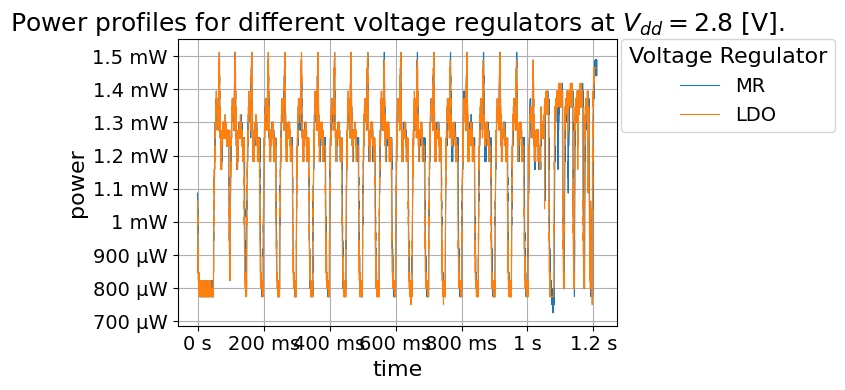

In [7]:
# pp2_8
pp2_8_LDO = pd.read_csv("Data/2,8_LDO.csv",delimiter=',',skiprows=7, index_col=0)

for i,pp in enumerate([pp2_8_LDO]):
    pp['CH1(V)'] = (2.8 - pp['CH1(V)']) * pp['CH1(V)'] / 177
    pp.rename(columns={'CH1(V)': 'CH1(W)'},inplace=True)

pps2_8 = [pp2_8,pp2_8_LDO]

npps2_8 = []
for ind, pp in enumerate(pps2_8):
    
    peaks, _ = find_peaks(pp['CH1(W)'].values, prominence=.0001)
    
    for i, peak in enumerate(pp['CH1(W)'][peaks].values):
        
        if pp['CH1(W)'][peaks].values[0] - peak < -0.00005:
            break

    start = peaks[i-1]
    time = pp['Time(S)'][start:].values - pp['Time(S)'][start]
    x = pp['CH1(W)'][start:]

    stop = np.argmin(np.abs(time-1.21))

    npp = pd.DataFrame(dtype=float)    
    npp['t'] = time[:stop]
    npp['w'] = x[:stop].values
    npps2_8.append(npp)

times = [npp['t'] for npp in npps2_8]
chs   = [npp['w'] for npp in npps2_8]
labels = ["MR","LDO"]
labels_title = "Voltage Regulator"
title = "Power profiles for different voltage regulators at $V_{dd} = 2.8$ [V]."
plot_pp(times,chs,labels,labels_title,title,'Export/pp2,8.pdf')